## Linear Regression Model

### 0. Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
#For linear Regression using the statsmodels package
import statsmodels.api as stm

C:\Users\MANDY\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#For linear Regression using the sklearn package
import scipy.stats as stats
import sklearn

### 1. Reading the Data

In [4]:
#Setting the working directory
#os.chdir("C:/Users/Gourab/Desktop/R")

In [5]:
# cars = pd.read_csv('C:/Users/Gourab/Desktop/R/cars.csv')
cars= pd.read_csv("C:\\Users\\MANDY\\Desktop\\dataset\\cars.csv")

#Reading the data
# cars = pd.read_csv("cars.csv")

In [6]:
cars.dtypes

Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Model             int64
Origin           object
dtype: object

In [7]:
#Printing a part of the data
cars.sample(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
251,Volkswagen Rabbit Custom Diesel,43.1,4,90.0,48,1985,21.5,78,Europe
372,Oldsmobile Cutlass LS,26.6,8,350.0,105,3725,19.0,81,US
231,Mercury Cougar Brougham,15.0,8,302.0,130,4295,14.9,77,US
344,Honda Accord,32.4,4,107.0,72,2290,17.0,80,Japan
98,Chevrolet Caprice Classic,13.0,8,400.0,150,4464,12.0,73,US
91,Toyota Corolla 1600 (sw),27.0,4,97.0,88,2100,16.5,72,Japan
112,Plymouth Custom Suburb,13.0,8,360.0,170,4654,13.0,73,US
111,Ford Country,12.0,8,400.0,167,4906,12.5,73,US
296,Buick Estate Wagon (sw),16.9,8,350.0,155,4360,14.9,79,US
113,Oldsmobile Vista Cruiser,12.0,8,350.0,180,4499,12.5,73,US


### 2. Objective

To predict the MPG (Miles per gallon) of cars based on the Weight (in pounds) of the cars

**Target (Response) Variable** - MPG

**Explanatory Variable (Predictors)** - Weight

### 3. Understanding the variable

#### Variable: MPG

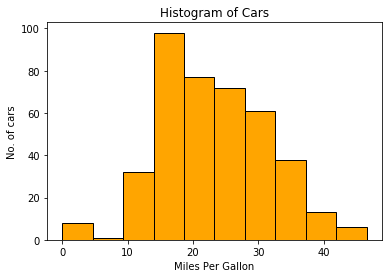

In [8]:
#Histogram of the variable MPG
cars.MPG.hist(grid=False, color="orange", edgecolor="black", bins=10)
plt.xlabel("Miles Per Gallon")
plt.ylabel("No. of cars")
plt.title("Histogram of Cars")
plt.show()

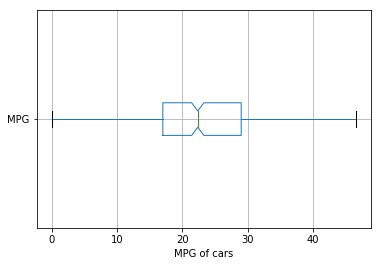

In [9]:
#Boxplot of the variable MPG
cars.boxplot(column="MPG", notch=True, vert=False)
plt.xlabel("MPG of cars")
plt.show()

In [10]:
cars[['MPG']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,406.0,23.051232,8.401777,0.0,17.0,22.35,29.0,46.6


**Observations and Notes**



1. Anomalies?
2. Shape?
3. Outliers?
4. etc.?

#### Variable: Weight

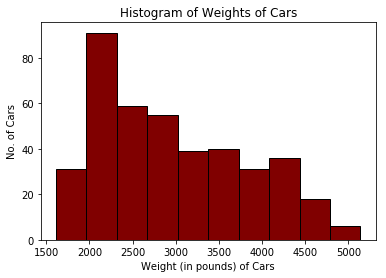

In [11]:
#Histogram of the variable Weight
cars.hist(column="Weight", grid=False, color = "maroon", edgecolor="black")
plt.xlabel("Weight (in pounds) of Cars")
plt.ylabel("No. of Cars")
plt.title("Histogram of Weights of Cars")
plt.show()

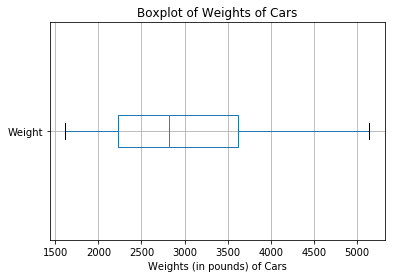

In [12]:
#Boxplot of Weights of Cars
cars.boxplot(column='Weight', vert=False)
plt.xlabel('Weights (in pounds) of Cars')
plt.title('Boxplot of Weights of Cars')
plt.show()

In [13]:
cars[['Weight']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,406.0,2979.413793,847.004328,1613.0,2226.5,2822.5,3618.25,5140.0


**Observations and Notes**


1. Anomalies?
2. Shape?
3. Outliers?
4. etc.?

### 4. Studying the Association between the Target and the Explanatory Variable

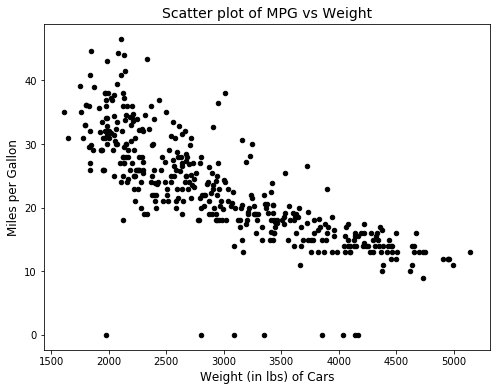

In [14]:
#Plotting the scatter plot to study the association between MPG and Weight
cars.plot(kind='scatter', x='Weight', y='MPG', color='black', figsize=(8,6))
plt.ylabel('Miles per Gallon', fontsize=12)
plt.xlabel('Weight (in lbs) of Cars', fontsize=12)
plt.title('Scatter plot of MPG vs Weight',fontsize=14)
plt.show()


### 5. Removing the anomalies

In [15]:
#Let us remove the observations for which MPG is 0
cars2 = cars.loc[cars.MPG != 0, ]

In [16]:
cars2[['MPG','Weight']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.50,23.0,29.0,46.6
Weight,398.0,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0


### 6. Train-Test Split for Model Fitting and Validation

In [17]:
#Randomly divide the data into train (70%) and test (30%)

#Step 1 - Select 0.7*398 random numbers between 1 and 406 (with some of the numbers removed in between)
np.random.seed(0)
train = np.random.choice(cars2.index, round(0.7*398), replace=False)
train.sort()
train

array([  1,   2,   3,   4,   5,   6,   7,   8,  15,  16,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  30,  32,  33,  35,  36,
        40,  41,  42,  44,  47,  51,  52,  53,  56,  58,  59,  61,  62,
        63,  66,  67,  68,  70,  71,  72,  73,  74,  75,  78,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  90,  92,  93,  96,  97,  99,
       100, 103, 104, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 123, 125, 127, 129, 131, 132, 133, 136, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153,
       156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       171, 173, 174, 175, 177, 178, 180, 182, 183, 186, 188, 189, 191,
       193, 195, 196, 197, 198, 201, 203, 205, 206, 207, 211, 212, 213,
       215, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 230,
       231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 252, 253, 254, 255, 256, 257, 259, 26

In [18]:
#Step 2 - Select the observations from the data corresponding to the train indices
X_train = cars2.loc[train, ['Weight']]
y_train = cars2.loc[train, 'MPG']


In [19]:
#Step 3 - Get the indices for the test data

test = []
for i in list(cars2.index):
    if i not in train:
        test.append(i)
        
test = np.array(test)
test.sort()
test

array([  0,   9,  29,  31,  34,  37,  38,  43,  45,  46,  48,  49,  50,
        54,  55,  57,  60,  64,  65,  69,  76,  77,  79,  89,  91,  94,
        95,  98, 101, 102, 105, 106, 112, 122, 124, 126, 128, 130, 134,
       135, 137, 138, 150, 154, 155, 158, 170, 172, 176, 179, 181, 184,
       185, 187, 190, 192, 194, 199, 200, 202, 204, 208, 209, 210, 214,
       216, 218, 229, 234, 249, 250, 251, 258, 263, 264, 269, 272, 273,
       274, 277, 280, 284, 286, 292, 295, 297, 298, 299, 308, 312, 321,
       322, 323, 328, 330, 336, 340, 342, 344, 345, 350, 352, 356, 358,
       360, 362, 366, 368, 372, 374, 375, 376, 378, 383, 388, 390, 392,
       393, 404])

In [20]:
#Step 4 - Slice the test data
X_test = cars2.loc[test, ['Weight']]
y_test = cars2.loc[test, 'MPG']


In [21]:
#Some checks...
print(len(train), len(train))
print(len(test), len(X_test))


279 279
119 119


In [22]:
279+119

398

### 7. Fitting a Simple Linear Regression Model (Using the statsmodel package)

In [23]:
#This step is done to add get the constant term for the model
X_train = stm.add_constant(X_train)  #This will help us to get the value of a in Y = a + bX
X_train.head()

,const,Weight
1,1.0,3693
2,1.0,3436
3,1.0,3433
4,1.0,3449
5,1.0,4341


In [24]:
#Ordinary Least Squared (OLS) Regression
model = stm.OLS(y_train,X_train).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     572.4
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           2.32e-69
Time:                        23:39:31   Log-Likelihood:                -816.49
No. Observations:                 279   AIC:                             1637.
Df Residuals:                     277   BIC:                             1644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5396      0.994     46.804      0.000      44.582      48.497
Weight        -0.0078      0.000    -23.925      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       28.188   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.702
Skew:                           0.684   Prob(JB):                     3.94e-09
Kurtosis:                       4.207   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared = 0.674
a = 46.5396
b = -0.00775

In [25]:
model.params

const     46.539608
Weight    -0.007751
dtype: float64

Y = a + b * X
MPG = a + b * Weight

MPG = 46.5396 - 0.007751 * Weight   --> Linear Regression Equation to Predict MPG on Weight
R^2 = 0.674

Y = a + b * X

b = slope of the line. If X increases by 1 unit then Y increases by b units.
a = intercept of the line. It is the value of Y for which the value of X is 0.

MPG = 46.5396 + -0.007751 * Weight

slope = -0.007751   => With 1,000 lb increase in weight the MPG of the car decreases by 0.007751 times.
intercept = 46.5396 => The MPG of the car is 46.5396 on average when the weight of the car is 0 lbs (No meaning)

R^2 = 0.674 => R^2 is a measure of the goodness of fit of the model. It measured how well the model fits the data.

Interpreta
tion:
R squared: The proportion of variation in the targer explained by the predictor

In our case:
67.4% of **variation** of the variable MPG is explained by the predictor Weight using this regression model.

The value of R squared ranges between 0 to 1 (or 0% to 100%). Higher the value of R square better is the model fit.

In [26]:
Weight = np.sort(X_train.Weight)
#model.params[0] + model.params[1]*Weight #Predicted values of MPG foe a value of Weight

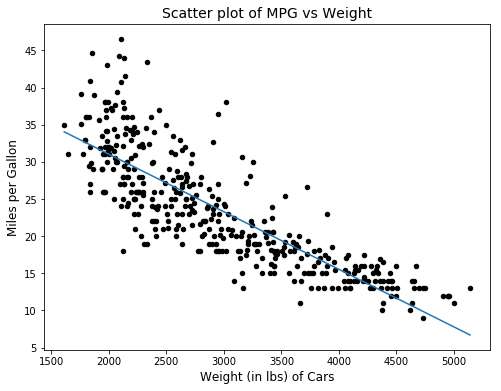

In [27]:
#Ploting the linear regression line

#Scatter Plot 
cars2.plot(kind='scatter', x='Weight', y='MPG', color='black', figsize=(8,6))
plt.ylabel('Miles per Gallon', fontsize=12)
plt.xlabel('Weight (in lbs) of Cars', fontsize=12)
plt.title('Scatter plot of MPG vs Weight',fontsize=14)


#Sorted values of Weight
Weight = np.sort(X_train.Weight)

#Plotting the sorted values of weight with its fitted value
plt.plot(Weight, model.params[0] + model.params[1]*Weight)


plt.show()




In [28]:
model.params

const     46.539608
Weight    -0.007751
dtype: float64

### 8. Making Prediction using the Model (on the test data)

In [29]:
X_test = stm.add_constant(X_test)
X_test.head()

,const,Weight
0,1.0,3504
9,1.0,3850
29,1.0,2234
31,1.0,4615
34,1.0,4732


In [30]:
#Prediction
#Model: MPG = 46.5396 - 0.007751 * Weight
model.predict(X_test)[:10]

#[46.53   -0.0077]*X_test

0     19.379685
9     16.697797
29    29.223607
31    10.768191
34     9.861310
37    29.270114
38    30.680817
43    20.945411
45    13.915145
46    11.938610
dtype: float64

In [31]:
#Storing the predicted values in an array
pred = model.predict(X_test)
pred[:10]

0     19.379685
9     16.697797
29    29.223607
31    10.768191
34     9.861310
37    29.270114
38    30.680817
43    20.945411
45    13.915145
46    11.938610
dtype: float64

In [32]:
y_test[:10]

0     18.0
9     15.0
29    26.0
31    10.0
34     9.0
37    25.0
38    25.0
43    19.0
45    14.0
46    14.0
Name: MPG, dtype: float64

### 9. Checking Accuracy

In [33]:
#Error = actual - predicted
e = y_test - pred
np.mean(e)

-0.003071992307418098

In [34]:
#Error^2
e**2

#RMSE = sqrt(sum(e**2)/(ntest-1))
math.sqrt(sum(e**2)/(len(y_test)-2))

3.9083793892163223

In [35]:
#RSS = sum of squared error; Note: RMSE = sqrt(RSS/(ntest-2))
rss = np.sum(e**2)
rss

1787.225245655962

A Model must have larger value of R square and smaller value of RMSE.

In [36]:
#Percentage error
(3.8917/np.mean(cars2.MPG))*100

16.550162413984694

Our prediction error are off by an average amount of 16.55%. If that is ok for you you may proceed.

### 10. Diagnostic Plots

Calculations required for some of the plots

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [38]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

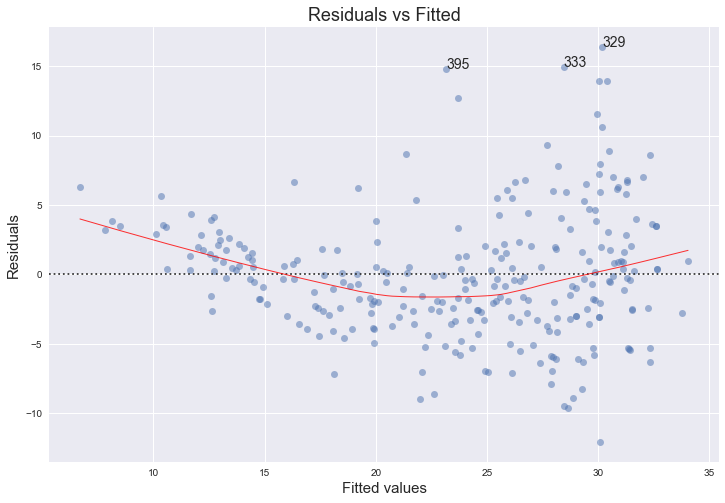

In [39]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)



plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y_train,
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})




plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));


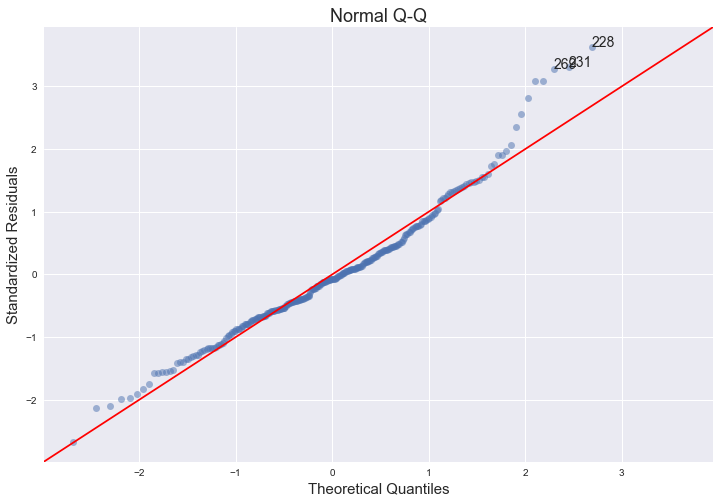

In [40]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

KeyError: 269

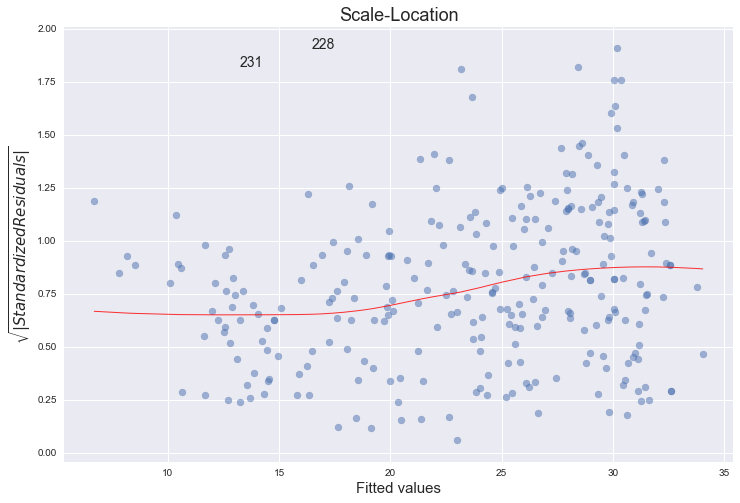

In [41]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

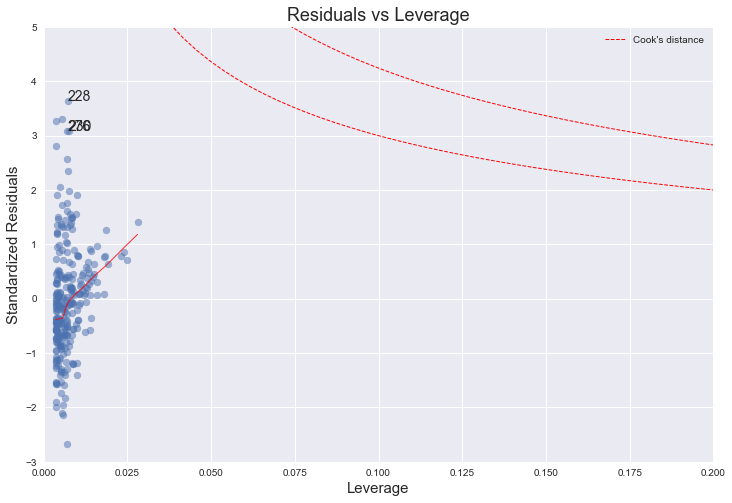

In [42]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')
p = len(model.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

### 11. Improving the Model

In [43]:
#Taking log transformation of the variables
cars2['log_Weight'] = np.log(cars2.Weight)
cars2['log_MPG'] = np.log(cars2.MPG)

C:\Users\MANDY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\MANDY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
cars2.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,log_Weight,log_MPG
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US,8.161660,2.890372
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US,8.214194,2.708050
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US,8.142063,2.890372
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US,8.141190,2.772589
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US,8.145840,2.833213


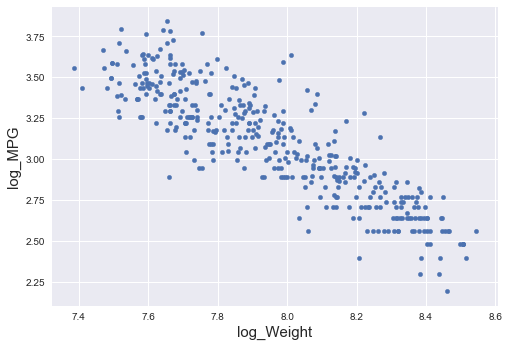

In [45]:
cars2.plot(kind='scatter', x='log_Weight', y='log_MPG')
plt.show()

In [46]:
#Creating the train and test data

#Training Data
X_train = cars2.loc[train, ['log_Weight']]
y_train = cars2.loc[train, 'log_MPG']

#Test Data
X_test = cars2.loc[test, ['log_Weight']]
y_test = cars2.loc[test, 'log_MPG']

#Adding a column for constant
X_train = stm.add_constant(X_train)

In [47]:
X_train.head()

,const,log_Weight
1,1.0,8.214194
2,1.0,8.142063
3,1.0,8.141190
4,1.0,8.145840
5,1.0,8.375860


In [48]:
model = stm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MPG   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     839.2
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           8.18e-86
Time:                        23:44:59   Log-Likelihood:                 99.393
No. Observations:                 279   AIC:                            -194.8
Df Residuals:                     277   BIC:                            -187.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5449      0.291     39.610      0.000      10.971      12.119
log_Weight    -1.0612      0.037    -28.969      0.000      -1.133      -0.989
==============================================================================
Omnibus:                        6.839   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                8.606
Skew:                           0.200   Prob(JB):                       0.0135
Kurtosis:                       3.762   Cond. No.                         231.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 2:**

log(MPG) = 11.5449 - 1.0612 * log(Weight)

**Interpretation**

With one unit increase in log(Weight) the log(MPG) decreases by 1.0612 units.

In [ ]:
y_test[:10]

In [ ]:
#Making Predicting on test data
X_test = stm.add_constant(X_test)
pred = model.predict(X_test)
pred[:10]

In [ ]:
#RMSE
math.sqrt(sum((y_test - pred)**2)/(len(y_test)-1))

In [ ]:
0.1531/np.mean(y_test)

In [ ]:
np.mean(y_test)

In [ ]:
#RSS
np.sum((np.exp(pred) - np.exp(y_test))**2)

In [ ]:
#RMSE
math.sqrt(np.sum((np.exp(pred) - np.exp(y_test))**2)/(len(y_test)-1))

In [ ]:
#Check the diagnostic plot


### Multiple Linear Regression Model

In [ ]:
#Pairwise Scatter plot

from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars2[["MPG", "Weight", "Horsepower"]], alpha=0.75, figsize=(10, 8), diagonal='kde')
plt.show()

In [ ]:
#Let us remove the observations for which MPG is 0
cars2 = cars.loc[(cars.MPG != 0) & (cars.Horsepower !=0), ]

In [ ]:
cars2.isnull().sum()

In [ ]:
cars2[['MPG','Horsepower']].describe().transpose()

In [ ]:
#cars2.head()

In [ ]:
cars2.shape

In [ ]:
#Creating log transformed features
cars2['log_MPG'] = np.log(cars2.MPG)
cars2['log_Weight'] = np.log(cars2.Weight)
cars2['log_Horsepower'] = np.log(cars2.Horsepower)
cars2.head()

In [ ]:
#Pairwise Scatter plot

from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars2[["log_MPG", "log_Weight", "log_Horsepower"]], alpha=0.75, figsize=(10, 8), diagonal='hist')
plt.show()

In [ ]:
#Randomly divide the data into train (70%) and test (30%)

#Step 1 - Select 0.7*398 random numbers between 1 and 406 (with some of the numbers removed in between)
np.random.seed(0)
train = np.random.choice(cars2.index, round(0.7*392), replace=False)
train.sort()


#Step 3 - Get the indices for the test data
test = []
for i in list(cars2.index):
    if i not in train:
        test.append(i)
        
test = np.array(test)
test.sort()
#test


In [ ]:
#Creating the train and test data

#Training Data
X_train = cars2.loc[train, ['log_Weight', 'log_Horsepower']]
y_train = cars2.loc[train, 'log_MPG']

#Test Data
X_test = cars2.loc[test, ['log_Weight', 'log_Horsepower']]
y_test = cars2.loc[test, 'log_MPG']

#Adding a column for constant
X_train = stm.add_constant(X_train)
X_train.head()

In [ ]:
#cars2.isnull().sum()

In [ ]:
#y_train.isnull().sum()

In [ ]:
model = stm.OLS(y_train,X_train).fit()
model.summary()

In [ ]:
#Making Predicting on test data
X_test = stm.add_constant(X_test)
pred = model.predict(X_test)

#RSS
np.sum((np.exp(pred) - np.exp(y_test))**2)

In [ ]:
math.sqrt(np.sum((np.exp(pred) - np.exp(y_test))**2)/len(test)-1)

In [ ]:
3.37714/np.mean(np.exp(y_test))*100

### Plotting Linear Regression Line using sklearn Package

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

In [ ]:
#Creating the train and test data

#Training Data
X_train = cars2.loc[train, ['Weight']]
y_train = cars2.loc[train, 'MPG']

#Test Data
X_test = cars2.loc[test, ['Weight']]
y_test = cars2.loc[test, 'MPG']


In [ ]:
#Fitting the linear regression model
lm.fit(X_train,y_train)

In [ ]:
#Printing the intercept
lm.intercept_

In [ ]:
#Printing the coefficient
lm.coef_

In [ ]:
#Making prediction on the test data
lm.predict(X_test)

In [ ]:
p = lm.predict(X_test)

In [ ]:
error = (p - y_test)

In [ ]:
math.sqrt(sum(error**2)/(len(test)-1))